In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

The dataset consists of TV Shows and Movies listed on the Netflix dataset from Kaggle. The dataset consists of TV Shows and Movies available on Netflix as of 2019. The dataset is collected from Flixable, which third-party Netflix search engine.

courtesy: https://medium.com/analytics-vidhya/netflix-movies-and-tvshows-exploratory-data-analysis-eda-and-visualization-using-python-80753fcfcf7

The EDA questions are from above article but python code is attempted on own.

In [2]:
netflix_df = pd.read_csv("netflix_titles.csv")

In [3]:
netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [4]:
netflix_df.shape

(6234, 12)

**Data Profiling & Cleaning**

In [5]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
netflix_df.dropna(subset=['rating','date_added'],inplace=True)# remove insignificant nA values

In [8]:
netflix_df.director.fillna("Director_NA", inplace=True)
netflix_df.cast.fillna("Cast_NA", inplace=True)
netflix_df.country.fillna("Country_NA", inplace=True)
# create a new cat called NA wherever values are missing for significant col

**Exploratory Analysis and Visualization**

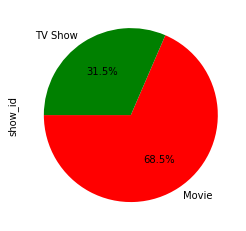

In [9]:
#compare the total number of movies and shows in this dataset to know which one is the majority.
netflix_df.groupby('type')['show_id'].count().plot.pie(colors=['red','green'],autopct='%1.1f%%', startangle=180)
plt.show()

In [10]:
#the amount of content Netflix has added throughout the previous years
temp = netflix_df.groupby(['release_year','type'])[['show_id']].count().unstack('type')


In [11]:
temp[('show_id','Total')] = temp[('show_id','Movie')]+temp[('show_id','TV Show')]

In [12]:
#remove 2020 data as it seems incomplete
temp.drop(2020,axis=0,inplace=True)
temp.tail()

show_id                
type           Movie TV Show   Total
release_year                        
2015           359.0   151.0   510.0
2016           592.0   236.0   828.0
2017           680.0   277.0   957.0
2018           646.0   416.0  1062.0
2019           400.0   443.0   843.0

In [13]:
temp.columns

MultiIndex([('show_id',   'Movie'),
            ('show_id', 'TV Show'),
            ('show_id',   'Total')],
           names=[None, 'type'])

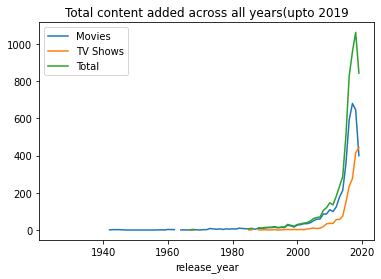

In [14]:
temp[('show_id','Movie')].plot(label='Movies')
temp[('show_id','TV Show')].plot(label='TV Shows')
temp[('show_id','Total')].plot(label='Total')
plt.title('Total content added across all years(upto 2019')
plt.legend()
plt.show()

we can conclude that the popular streaming platform started gaining traction after 2013. Since then, the amount of content added has been increasing significantly. The growth in the number of movies on Netflix is much higher than that on TV shows.  Besides, we can know that Netflix has increasingly focused on movies rather than TV shows in recent years

In [15]:
#netflix_df.country.unique()
#multiple countries are there in one value of country
#we need to separate and then count by country

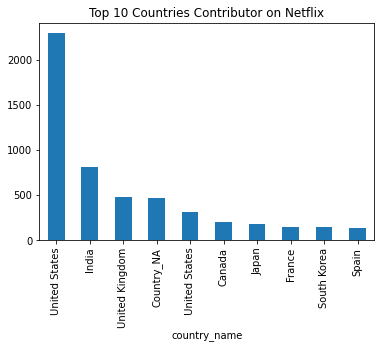

In [16]:
#Countries by the Amount of the Produces Content

netflix_df['id'] = netflix_df.index+1
select_country = netflix_df.set_index('id').country.str.split(',', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'country_name')
select_country.groupby('country_name').size().sort_values(ascending=False).head(10).plot.bar()
plt.title('Top 10 Countries Contributor on Netflix')
plt.show()

**Top Directors on Netflix**

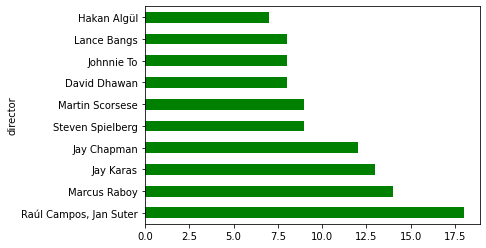

In [22]:
netflix_df.groupby('director').size().sort_values(ascending=False)[1:11].plot.barh(color='g')

**Top Genres on Netflix**

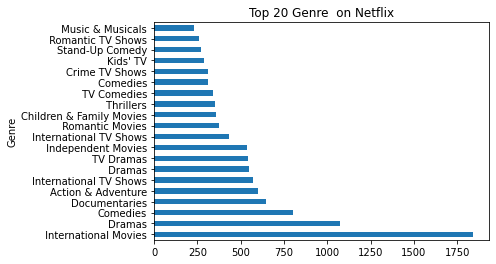

In [40]:
select_genre = netflix_df.set_index('id').listed_in.str.split(',', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'Genre')
select_genre.groupby('Genre').size().sort_values(ascending=False).head(20).plot.barh()
plt.title('Top 20 Genre  on Netflix')
plt.show()

**Amount of Content By Rating**

In [73]:
rating_df = netflix_df.groupby(['rating','type']).size().sort_values(ascending=False).reset_index()
rating_df.columns =['rating','type','count']
rating_df

,rating,type,count
0,TV-MA,Movie,1348
1,TV-14,Movie,1038
2,TV-MA,TV Show,677
3,TV-14,TV Show,657
4,R,Movie,506
5,TV-PG,Movie,432
6,PG-13,Movie,286
7,TV-PG,TV Show,267
8,NR,Movie,202
9,PG,Movie,183


In [75]:
rating_df.columns

Index(['rating', 'type', 'count'], dtype='object')

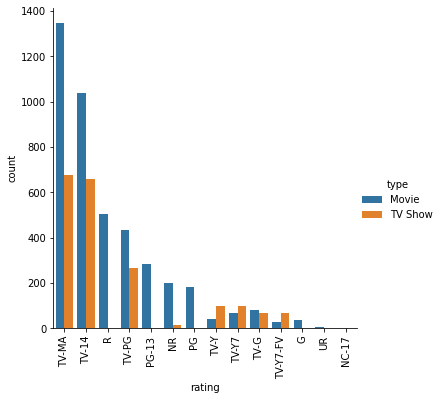

In [80]:
sns.catplot(x='rating', y='count', hue='type', data=rating_df, kind='bar')
plt.xticks(rotation=90)
plt.show()

The largest count of Netflix content is made with a “TV-14” rating. “TV-14” contains material that parents or adult guardians may find unsuitable for children under the age of 14. But the largest count of TV shows is made with a “TV-MA” rating. “TV-MA” is a rating assigned by the TV Parental Guidelines to a television program designed for mature audiences only.

**Top Actor on Netflix based on the number of titles**

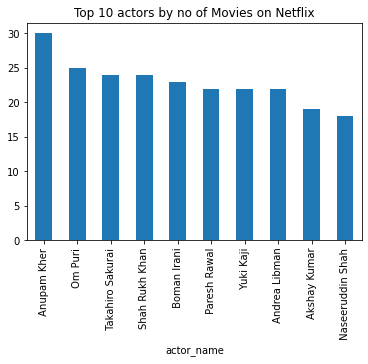

In [87]:
select_actor = netflix_df.set_index('id').cast.str.split(',', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'actor_name')
select_actor.groupby('actor_name').size().sort_values(ascending=False)[1:11].plot.bar()
plt.title('Top 10 actors by no of Movies on Netflix')
plt.show()

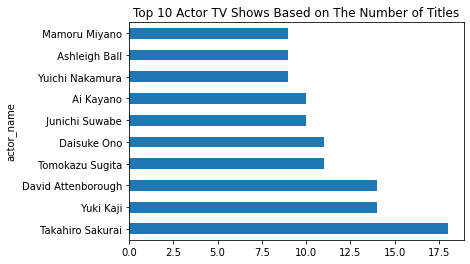

In [92]:
select_actor = netflix_df.set_index('type').cast.str.split(',', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'actor_name')
select_actor[select_actor.type=='TV Show'].groupby('actor_name').size().sort_values(ascending=False)[1:11].plot.barh()
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
plt.show()

The most popular actor on Netflix TV Shows based on the number of titles is Takahiro Sakurai,
The most popular actor on Netflix movie, based on the number of titles, is Anupam Kher.